In [244]:
# KNN Classification
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [245]:
animals = read_csv('Zoo.csv')

In [246]:
animals

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [247]:
animals.shape

(101, 18)

In [248]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [249]:
animals.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [250]:
animals.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


in the above dataset there are no null values .

In [251]:
for i in animals.columns:
    print(i)
    print(animals[i].value_counts())
    print()

animal name
animal name
frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: count, Length: 100, dtype: int64

hair
hair
0    58
1    43
Name: count, dtype: int64

feathers
feathers
0    81
1    20
Name: count, dtype: int64

eggs
eggs
1    59
0    42
Name: count, dtype: int64

milk
milk
0    60
1    41
Name: count, dtype: int64

airborne
airborne
0    77
1    24
Name: count, dtype: int64

aquatic
aquatic
0    65
1    36
Name: count, dtype: int64

predator
predator
1    56
0    45
Name: count, dtype: int64

toothed
toothed
1    61
0    40
Name: count, dtype: int64

backbone
backbone
1    83
0    18
Name: count, dtype: int64

breathes
breathes
1    80
0    21
Name: count, dtype: int64

venomous
venomous
0    93
1     8
Name: count, dtype: int64

fins
fins
0    84
1    17
Name: count, dtype: int64

legs
legs
4    38
2    27
0    23
6    10
8     2
5     1
Name: count, dtype: int64

t

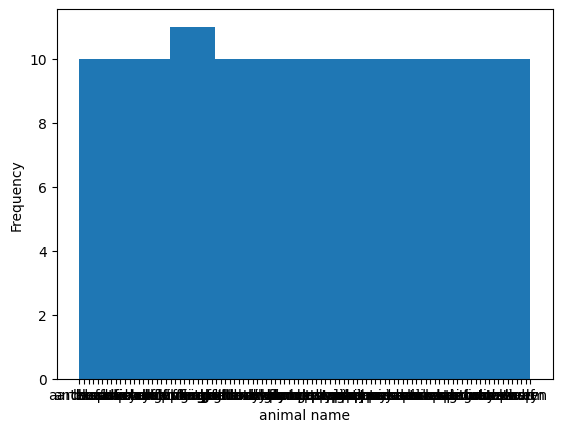

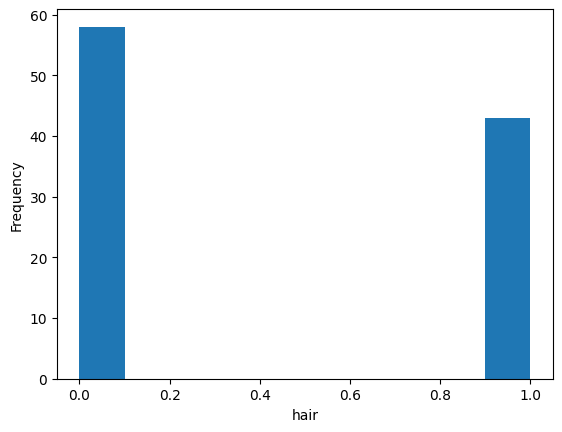

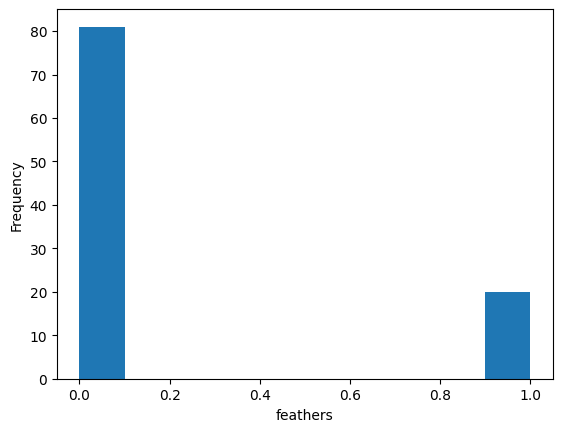

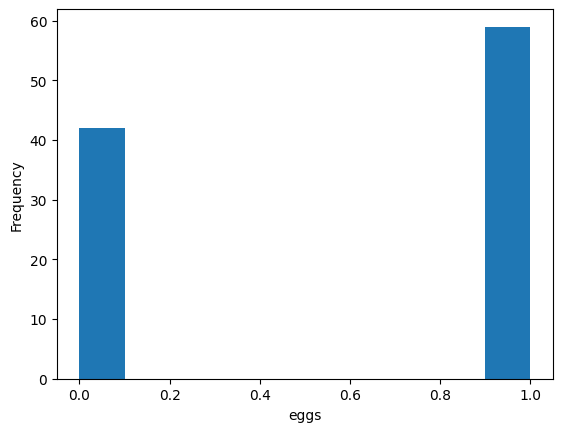

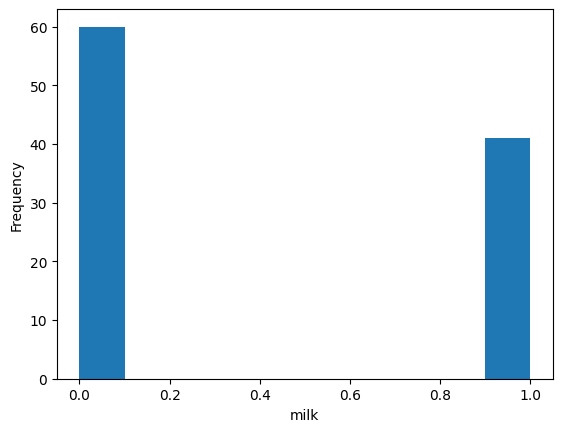

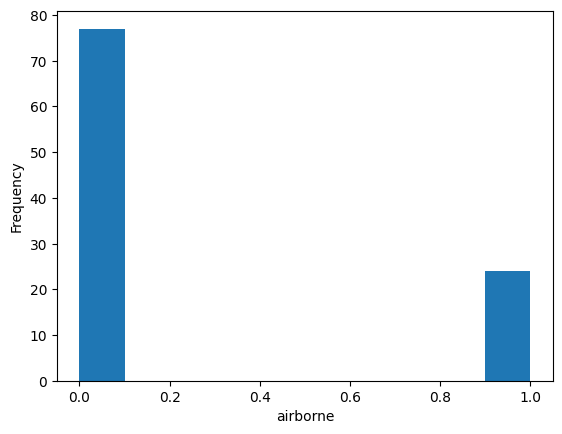

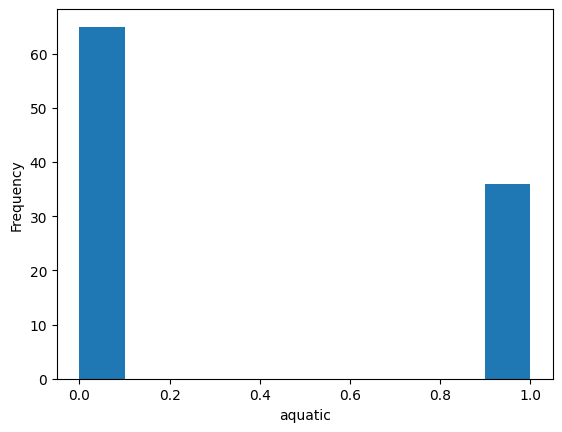

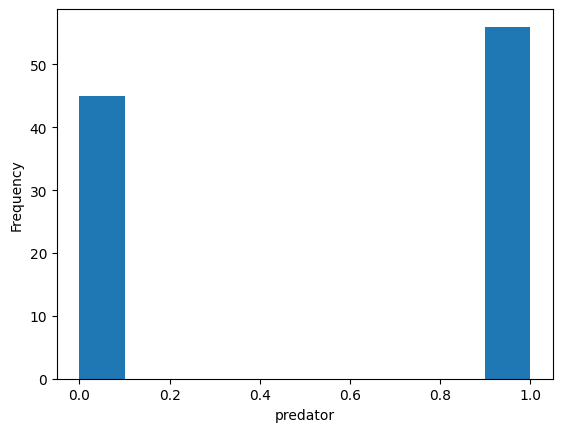

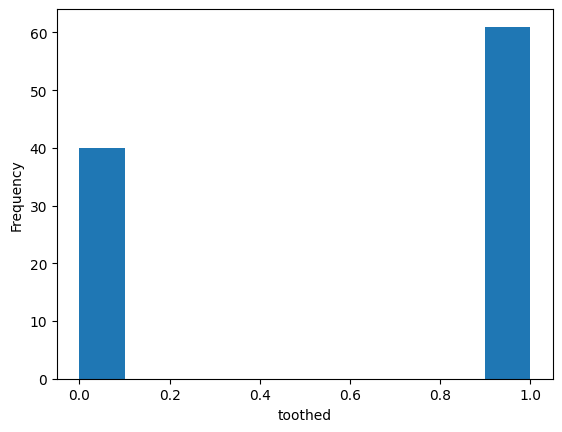

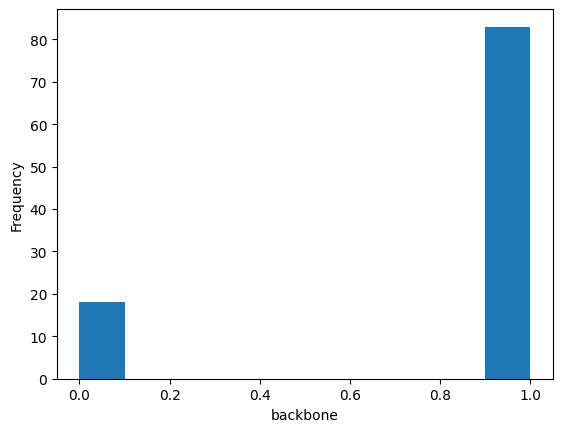

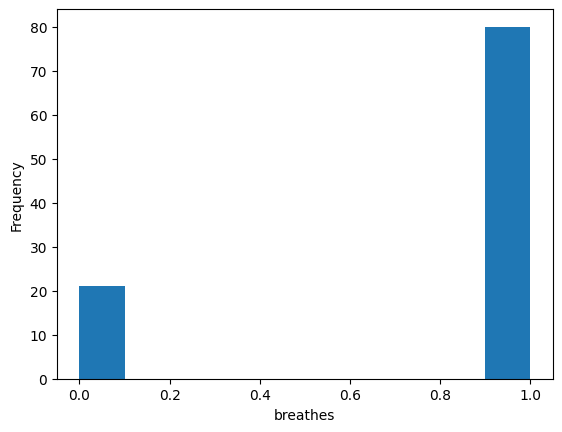

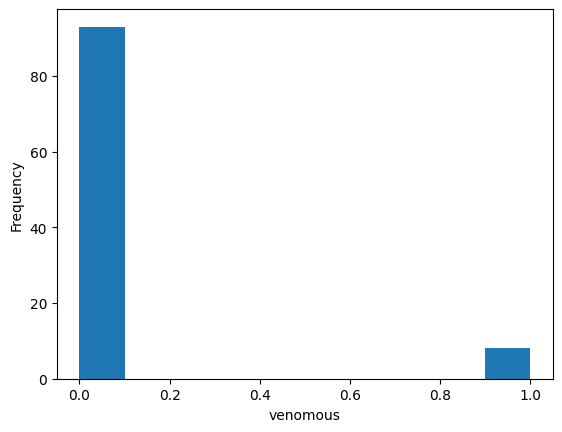

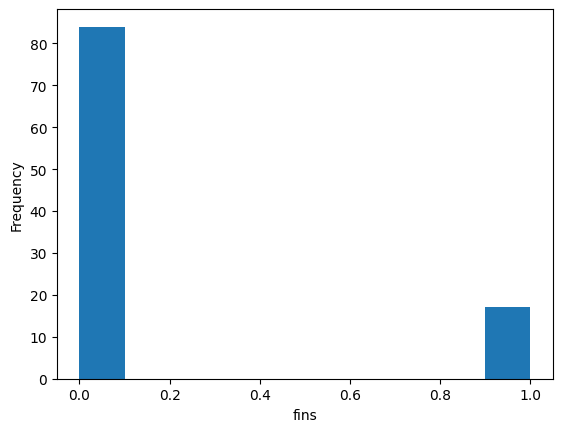

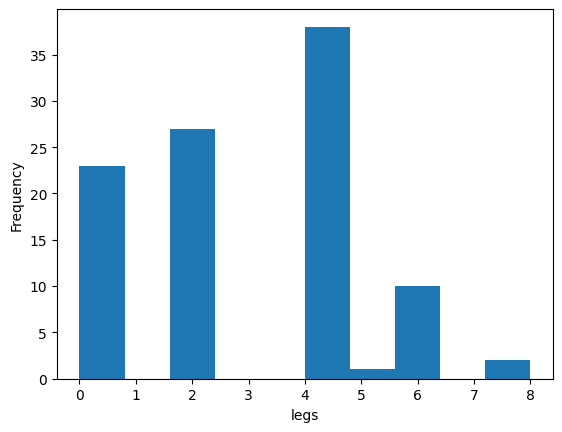

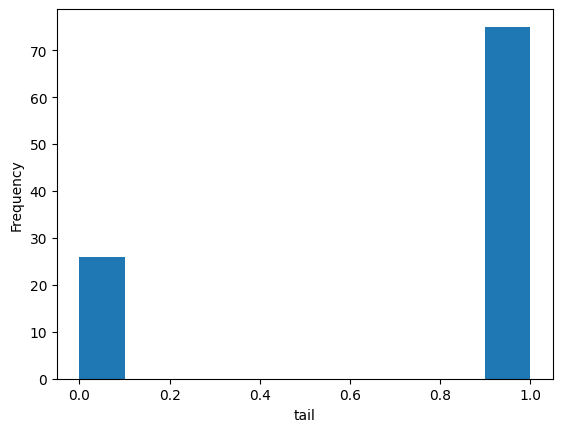

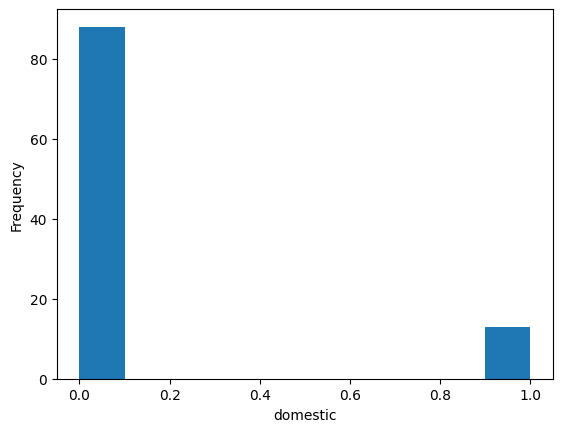

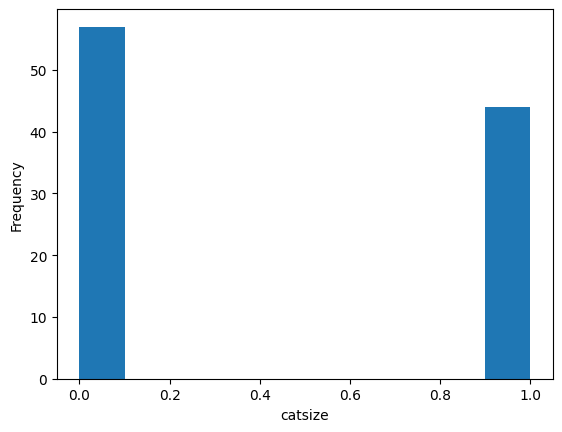

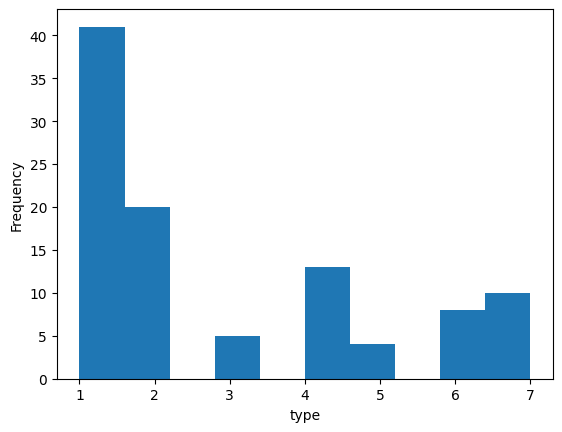

In [252]:
for i in animals.columns:
    plt.hist(animals[i])
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

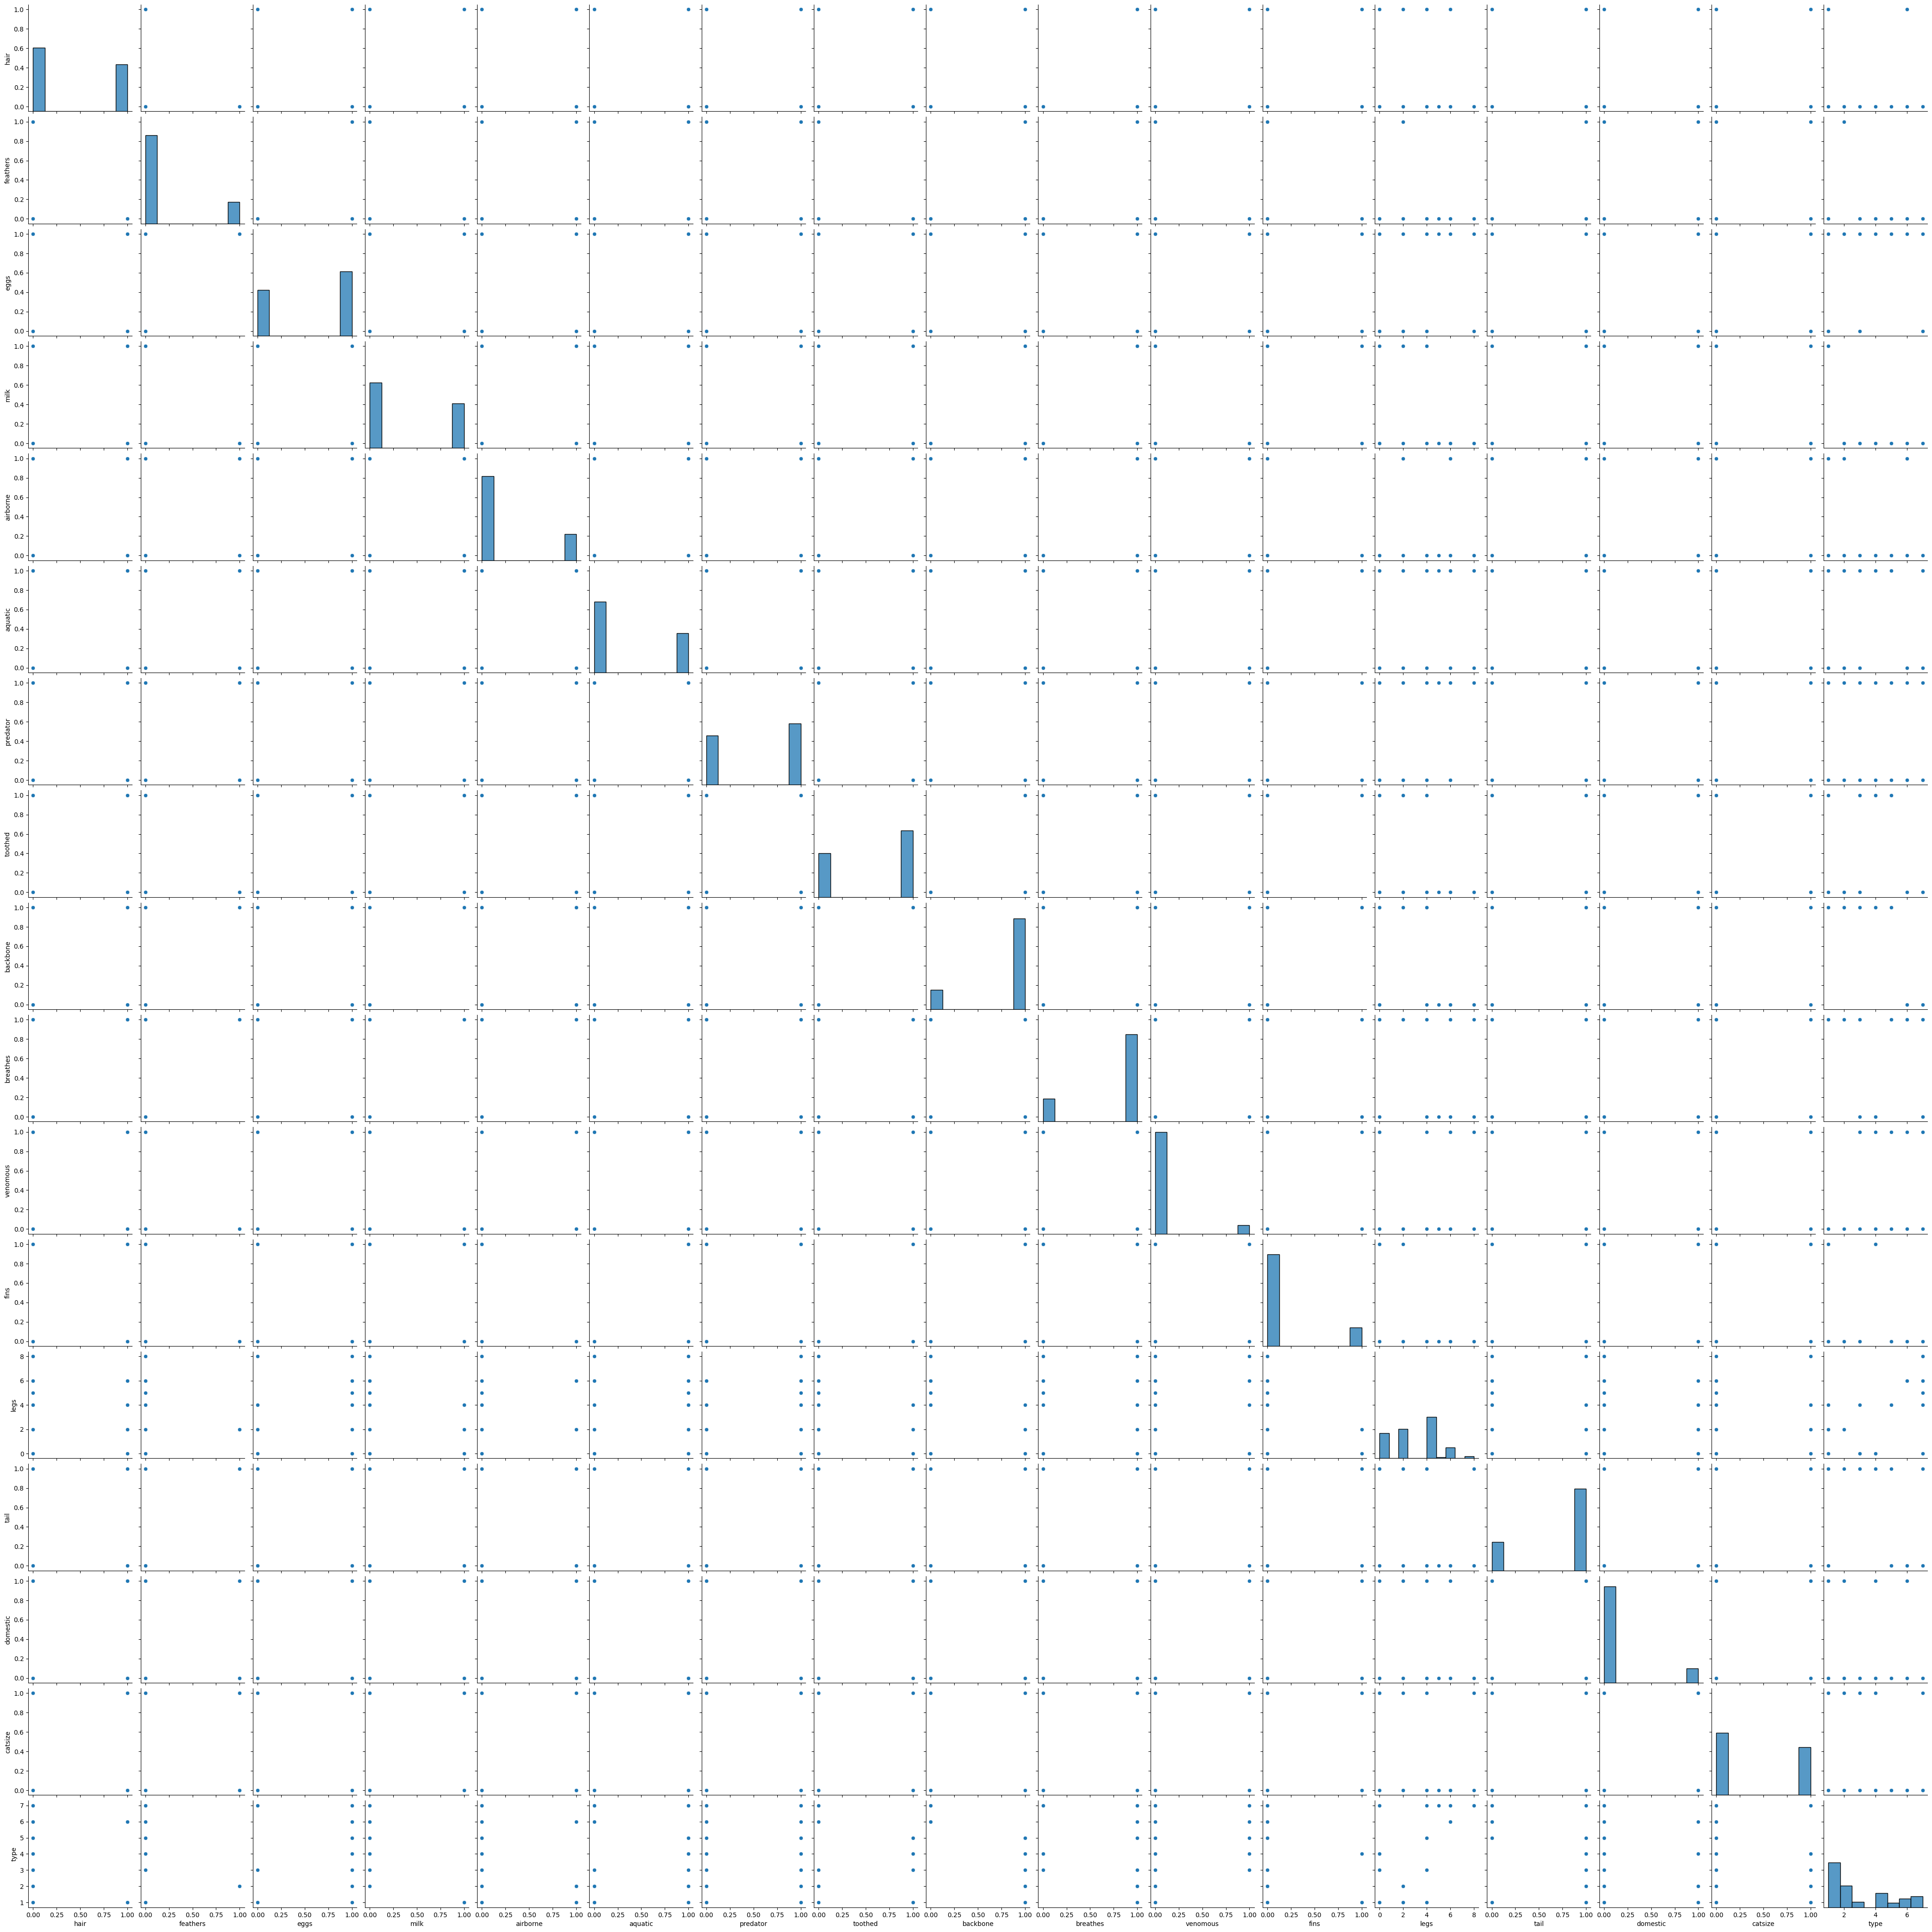

In [215]:
import seaborn as sns # Import the seaborn library

sns.pairplot(animals)
plt.show()

In [216]:
animals1 = animals.copy()

In [217]:
animals1.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [218]:
animals1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
96,False
97,False
98,False
99,False


In [219]:
animals1.duplicated().sum()

0

There are no duplicate values in the above dataset.

Model building

In [220]:
array = animals1.values
X = array[:,0:17]  # Features (assuming first 17 columns)
Y = array[:, 17]   # Target variable (assuming it's in the 18th column)
Y = Y.astype('int')

In [267]:
# Assuming 'animals1' is a pandas DataFrame
# Convert string columns in 'X' to numerical using LabelEncoder
label_encoders = {}
for col in range(17):  # Iterate over feature columns
    if type(X[0,col]) == str:  # Check if column is of type object (string)
        le = LabelEncoder()
        X[:, col] = le.fit_transform(X[:, col])
        label_encoders[col] = le  # Store the encoder for later use if needed

In [268]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state=42)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [269]:
# make predictions for test data
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]

In [270]:
Y_pred

array([2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 2, 7, 1, 1, 3,
       5, 7, 1, 7, 2, 1, 1, 2, 7])

In [271]:
Y_pred_train = model.predict(X_train)
Y_pred_train

array([3, 1, 1, 2, 1, 1, 7, 1, 2, 7, 4, 4, 2, 4, 1, 1, 1, 5, 3, 1, 7, 6,
       1, 1, 4, 4, 2, 1, 1, 1, 6, 2, 2, 1, 1, 1, 7, 1, 4, 1, 3, 2, 2, 1,
       3, 2, 1, 1, 2, 2, 1, 7, 2, 1, 1, 5, 2, 4, 2, 2, 7, 1, 4, 4, 2, 4,
       2, 7, 4, 6])

In [272]:
Y_pred_test = model.predict(X_test)

In [273]:
Y_pred_test

array([2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 2, 7, 1, 1, 3,
       5, 7, 1, 7, 2, 1, 1, 2, 7])

**Grid Search Algorithm Tuning**

In [274]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [275]:
# Assuming 'animals1' is a pandas DataFrame
# Convert string columns in 'X' to numerical using LabelEncoder
label_encoders = {}
for col in animals1.columns[0:17]:  # Iterate over feature columns
    if animals1[col].dtype == 'object':  # Check if column is of type object (string)
        le = LabelEncoder()
        animals1[col] = le.fit_transform(animals1[col])
        label_encoders[col] = le  # Store the encoder for later use if needed


In [276]:
array = animals1.values
X = array[:,0:17]  # Features (assuming first 17 columns)
Y = array[:, 17]   # Target variable (assuming it's in the 18th column)
Y = Y.astype('int')

In [277]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [278]:
model = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [279]:
best_model = grid_search.best_estimator_

In [280]:
best_model

KNeighborsClassifier(n_neighbors=1)

In [281]:
print(grid.best_score_)
print(grid.best_params_)

0.4057142857142857
{'n_neighbors': 19}


**KNN**

In [282]:
# Identify columns with string values (object dtype)
object_cols = animals1.select_dtypes(include=['object']).columns

In [283]:
# Apply Label Encoding to convert string features to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in object_cols:
    X[:, animals1.columns.get_loc(col)] = label_encoder.fit_transform(X[:, animals1.columns.get_loc(col)])

In [285]:
num_folds = 10
kfold = KFold(n_splits=num_folds)

In [286]:
model = KNeighborsClassifier(n_neighbors=1)
results = cross_val_score(model, X, Y, cv=kfold)

In [287]:
print(results.mean() * 100.0)

26.909090909090917


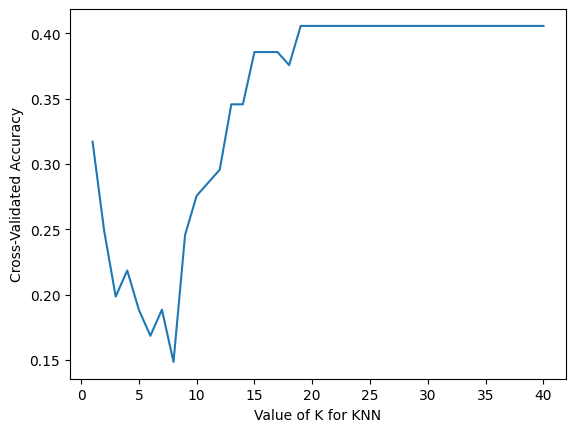

In [288]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [289]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix # Correct the module name to 'sklearn'

In [290]:
ac1 = accuracy_score(Y_train,Y_pred_train)
print("accuracy:" ,ac1.round(2) )
print('precision:' ,precision_score(Y_train,Y_pred_train,average='weighted').round(2))
print('recall:' ,recall_score(Y_train,Y_pred_train,average='weighted').round(2))

accuracy: 1.0
precision: 1.0
recall: 1.0


**Questions**


**Q1)**The key hyperparameters in KNN are:

n_neighbors: This is the number of nearest neighbors to consider when making a prediction. A smaller value can lead to overfitting, while a larger value might lead to underfitting.



weights: This determines how the neighbors' contributions are weighted. The default 'uniform' gives equal weight to all neighbors, while 'distance' weights them by the inverse of their distance.



metric: This specifies the distance metric used to calculate the distance between data points. Common choices include Euclidean, Manhattan, and Minkowski distances.


**Q2)**Some of the common distance metrics that can be used in KNN are:

Euclidean Distance: This is the most common distance metric, calculating the straight-line distance between two points.



Manhattan Distance: This measures the sum of absolute differences between the coordinates of two points.



Minkowski Distance: This is a generalized distance metric that includes both Euclidean and Manhattan distances as special cases. It introduces a parameter 'p' to control the degree of the distance.



Chebyshev Distance: This calculates the maximum absolute difference between the coordinates of two points.
Hamming Distance: This is used for categorical data, counting the number of positions where two strings differ.